<a href="https://colab.research.google.com/github/gurung-ajay/ML-models-comparison-on-HR-dataset/blob/main/ML_models_that_predict_if_employee_will_leave_the_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset hr.csv consists of data about different factors affecting employees to leave their job. A model is created for Logistic Regression, KNN, SVM, Decision Tree and Random Forest to classify and predict whether employee will leave company or not. Finally, comparison is made between these two models to identify the best one.

Tools used: Pandas, Matplotlib, Seaborn, Plotly.express, Scikit learn

# Importing Libraries

In [ ]:
# for data manipulation
import pandas as pd
# for visualizing data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# for encoding categorical data
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# for training and modeling
from sklearn.model_selection import train_test_split
# for logistic regressing modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# for knn modeling, scaling and cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# for Support Vector Machine(Classifier)
from sklearn.svm import SVC
# for Decision Tree
from sklearn.tree import DecisionTreeClassifier
# for RandomFroest
from sklearn.ensemble import RandomForestClassifier

# Data Profiling and Inspection

In [ ]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 44.7MB/s]


In [ ]:
df = pd.read_csv('/content/hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


From this data, a model is to be made which predicts whether an employee left the company or not, considering other variables that affect their leaving decision. It can also predict whether any employee will leave the company or not in future.

So, dependent variable = 'left'

In [ ]:
df.shape

(15004, 11)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [ ]:
df.describe(include = 'object')

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()/len(df)*100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.193282
age                      79.472141
dtype: float64

Here Salary and age has Null values

# Data Preprocessing
* Handling Null values from 'age' and 'salary' column
* Handling ? values from 'left' column
* Encoding categorical data

In [ ]:
# Handling ? values

In [ ]:
df.describe(include = 'object')

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


In [ ]:
df.left.value_counts()

0    11428
1     3572
?        4
Name: left, dtype: int64

* Treating '?' in column 'left'

'left' is supposed to be a discrete data type column with 0 and 1 only, but it seems that it also contains '?' which made it seem like a string(object) data type. There are only 4 '?' values. Let's replace it with the value having highest frequency i.e. 0.

In [ ]:
# finding value with highest frequency and replacing ? with it
most_common_value = df['left'].mode().iloc[0]
df['left'] = df['left'].replace('?', most_common_value)

In [ ]:
df['left'].value_counts()

0    11432
1     3572
Name: left, dtype: int64

In [ ]:
# converting the column 'left' values to integer so we can do numerical analysis
df['left'] = df['left'].astype(int)

In [ ]:
df['left'].describe()

count    15004.000000
mean         0.238070
std          0.425916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

Now 'left' is no loger categorical data, it is numerical data

Now, for null values:
* 'age' has 79.47% values missing
* 'salary' has 0.19% value missing

* Treating null values in 'age':


In [ ]:
df['age'].corr(df['left'])

0.009102871033218852

In [ ]:
df_cleaned = df.drop(columns = 'age')

Since age column has high missing values and its correlation with the dependent variable 'left' is very low, it doesn't provide any valueable insight to the data.
So it is dropped.

* Treating null values in 'salary':

In [ ]:
df_cleaned['salary'].value_counts()

low       7289
medium    6449
high      1237
Name: salary, dtype: int64

In [ ]:
df_cleaned['salary'].isnull().sum()

29

In this dataset 'salary' is a column with categorical value.This is a very big dataset with 15004 entries and out of them only 29 are missing, which is signifincantly small in quantity. In this situtaion, replacing the null values with the mode will help fill null values without disrupting the original data.

In [ ]:
# finding mode and replacing null values with it
most_common_salary = df_cleaned['salary'].mode().iloc[0]
df_cleaned['salary'] = df_cleaned['salary'].fillna(most_common_salary)

In [ ]:
df_cleaned['salary']

0           low
1        medium
2        medium
3          high
4          high
          ...  
14999    medium
15000       low
15001    medium
15002       low
15003    medium
Name: salary, Length: 15004, dtype: object

In [ ]:
df_cleaned.isna().sum().sum()

0

Now there are no null values in the dataset.

# Encoding categorical values

* salary: encoding using OrdinalEncoder, since its values follows a certain order

In [ ]:
df_cleaned['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
rank = ['high', 'medium', 'low']  # defining the ranking of data: high, medium and low
enc = OrdinalEncoder(categories = [rank])
enc.fit_transform(df_cleaned[['salary']])

array([[2.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

In [ ]:
df_cleaned[['salary']] = enc.fit_transform(df_cleaned[['salary']])

In [ ]:
df_cleaned['salary'].head() # After

0    2.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: salary, dtype: float64

In [ ]:
df['salary'].head() # Before

0       low
1    medium
2    medium
3      high
4      high
Name: salary, dtype: object

* Department: encoding using OneHotEncoder

In [ ]:
df['Department'].unique()

array(['IT', 'hr', 'support', 'product_mng', 'sales', 'technical',
       'marketing', 'management', 'accounting', 'RandD'], dtype=object)

In [ ]:
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['Department']]).toarray()
print(feature_array)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
ohe.categories_

[array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
        'product_mng', 'sales', 'support', 'technical'], dtype=object)]

In [ ]:
feature_labels = ohe.categories_[0] # storing depatment names in variable 'feature_lables'

In [ ]:
features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_cleaned = pd.concat([df_cleaned, features], axis=1)  # combining original table with one hot encoded table
df_cleaned.drop(columns=['Department'], inplace = True) # dropping the original column with categorical value
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.24,0.79,2,175,5,0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.49,2,155,3,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.45,0.45,2,154,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.46,0.73,6,256,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.14,0.54,5,275,4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


All categorical columns are now encoded

# Analyzing Dataset visually

* Analyzing distribution of data in dependent variable :'left'

In [ ]:
df_cleaned['left'].value_counts()

0    11432
1     3572
Name: left, dtype: int64

In [ ]:
fig = px.pie(df_cleaned, names = 'left')
fig.update_layout(width=500, height=450)

The data distribution between employee who left the company and who didn't, seems to be imbalanced. There are too little data of employee who left the company.

* Analyzing correlation between variables

<ipython-input-39-6dc1c4c1753e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

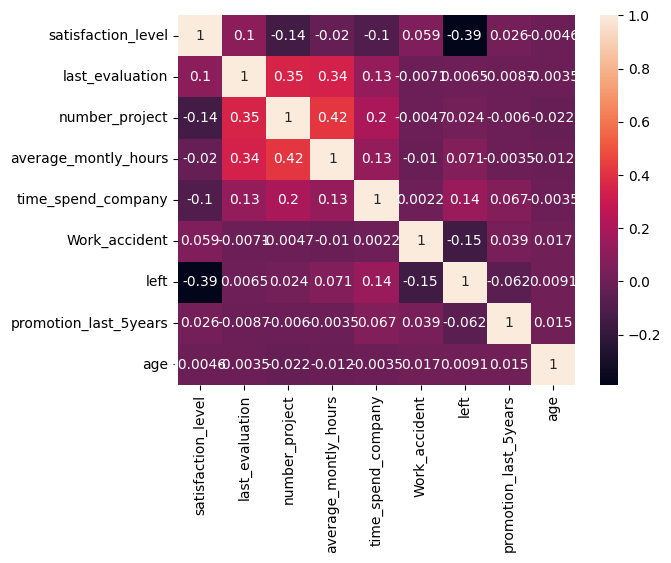

In [ ]:
sns.heatmap(df.corr(), annot=True)

* Analyzing relationship between 'satisfacion_level' and 'left'

<Axes: xlabel='left', ylabel='satisfaction_level'>

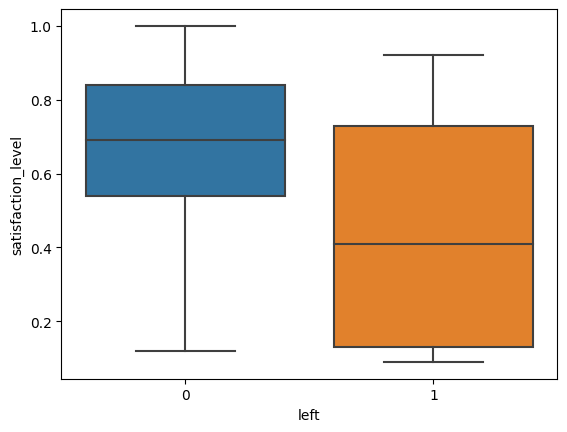

In [ ]:
sns.boxplot(data = df_cleaned, x = 'left', y='satisfaction_level')

From this boxplot, we can interpret that the employee who tend to leave the company had lower satisfaction level compared to the one who didn't.

* Anlyzing relationship between the last evaluation score of the employee and their leaving of company

<Axes: xlabel='left', ylabel='last_evaluation'>

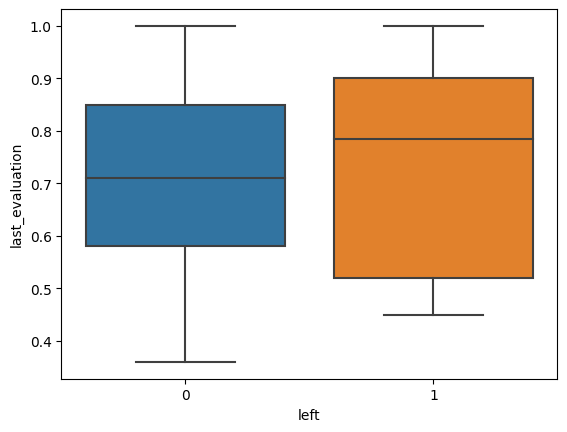

In [ ]:
sns.boxplot(data = df_cleaned, x = 'left', y = 'last_evaluation')

Employee who left the company seems to have slighly higher evaluation_level score than the ones who didn't

* Analyzing relationship between the tendency of leaving of company in different departments

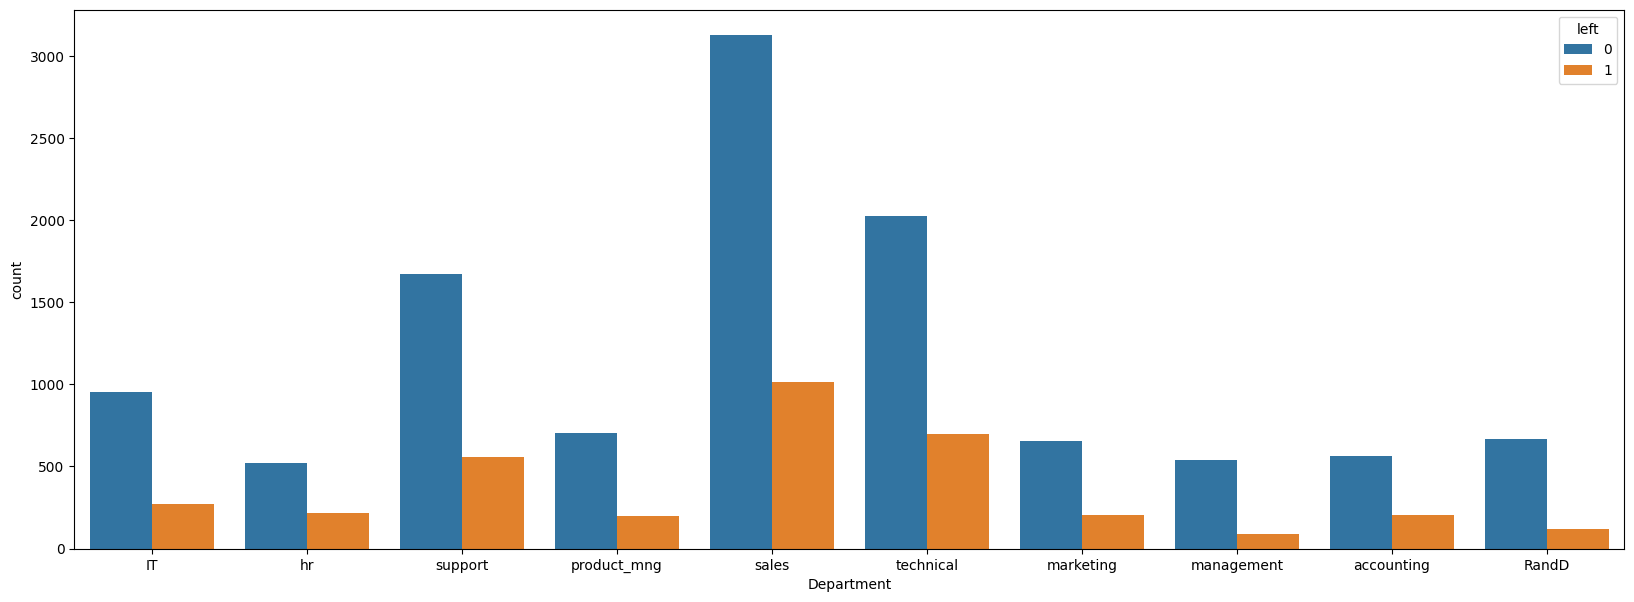

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(df, x = 'Department', hue = 'left')
plt.show()

From graph above, we can see that the highest number of people who left the company as well as stayed in the company were from sales department. This must be due to the fact that sales department has highest number of employee.

In [ ]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2230
IT             1228
product_mng     904
marketing       858
RandD           787
accounting      767
hr              739
management      631
Name: Department, dtype: int64

* Analyzing relationship between number of projects employee did and their leaving of company

In [ ]:
df['number_project'].unique()

array([2, 6, 5, 3, 4, 7])

<Axes: xlabel='left', ylabel='number_project'>

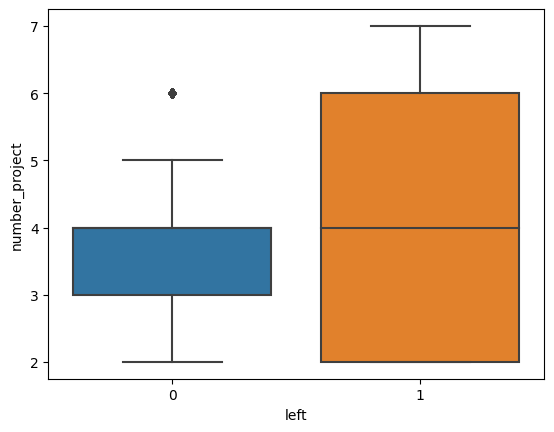

In [ ]:
sns.boxplot(data=df_cleaned, x = 'left', y = 'number_project')

The employee who left the company were involved in more number of projects that those who didn't.

<Axes: xlabel='left', ylabel='average_montly_hours'>

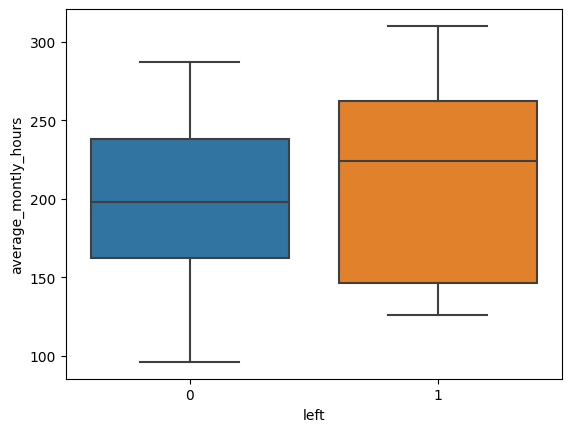

In [ ]:
sns.boxplot(data = df_cleaned, x = 'left', y='average_montly_hours')

Employee who left worked slightly more number of hours than who didn't

In [ ]:
df.time_spend_company.unique()

array([ 5,  3,  4,  8,  2,  6, 10,  7])

<Axes: xlabel='left', ylabel='time_spend_company'>

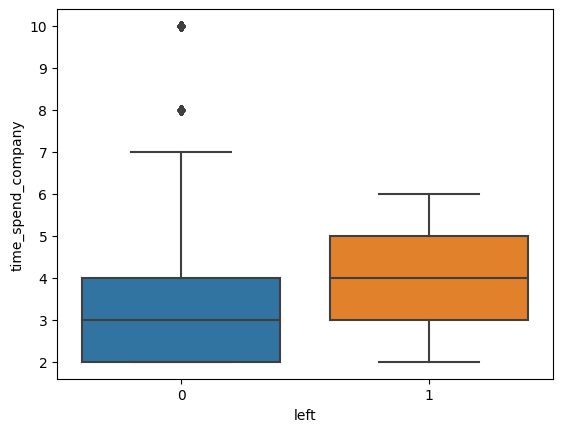

In [ ]:
sns.boxplot(data = df_cleaned, x = 'left', y = 'time_spend_company')

On average the employee who had left the company were the ones who had worked there for more number of years.

* Analyzing relationship between work accident and number of employee who left company

In [ ]:
df['Work_accident'].value_counts()

0    12835
1     2169
Name: Work_accident, dtype: int64

<Axes: xlabel='Work_accident', ylabel='count'>

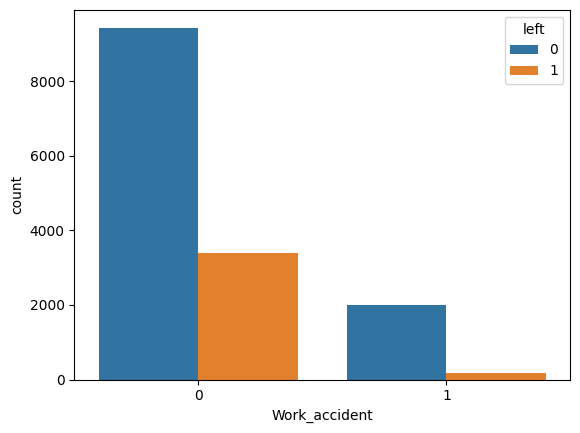

In [ ]:
sns.countplot(data = df, x = 'Work_accident', hue = 'left')

Since the data points of people who left the company is imbalanced(0 a lot more than 1), the graph is showing the number of employee who didn't leave the company to have very large number of work accident values for both 0 and 1 compared to employee who left the company.

* Analyzing salary and employee who left

<Axes: xlabel='salary', ylabel='count'>

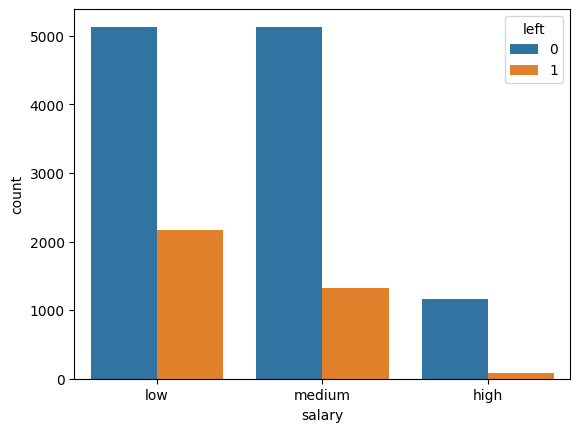

In [ ]:
sns.countplot(data = df, x = 'salary', hue = 'left')

It seems that the most employee who left the company had low to middle level salary. Only a few with high salary left the company.

# Setting independent and dependent variables

In [ ]:
df_cleaned.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.24,0.79,2,175,5,0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.49,2,155,3,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# creating list of column names of independent variables
# except 6 because column of index 6 has dependent variable
columns_except_6 = df_cleaned.columns.tolist()
columns_except_6.pop(6)

'left'

In [ ]:
X = df_cleaned[columns_except_6]  # independent variables
y = df['left']  # dependent variable

# Scaling Data

In [ ]:
# creating an object of StandardScaler, which is then used to fit and transform(scale) the independent variables
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

# Logistic Regression Model (without Cross Validation)

In [ ]:
model = LogisticRegression(solver = 'lbfgs', max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
model.score(X_test, y_test)

0.7890703098967011

## Logistic Regression Evaluation

In [ ]:
y_pred = model.predict(X_test)

* Accuracy

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7890703098967011

* Precision

In [ ]:
precision_score(y_true = y_test, y_pred = y_pred)

0.5990338164251208

* Recall

In [ ]:
recall_score(y_true = y_test, y_pred = y_pred)

0.34685314685314683

* F1 score

In [ ]:
f1_score(y_true = y_test, y_pred = y_pred)

0.43932683790965454

* Confusion Matrix

In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[2120,  166],
       [ 467,  248]])

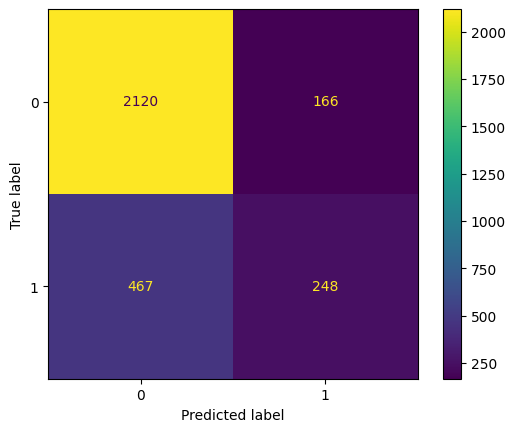

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
report = classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.60      0.35      0.44       715

    accuracy                           0.79      3001
   macro avg       0.71      0.64      0.65      3001
weighted avg       0.77      0.79      0.77      3001



## Logistic Regression (with cross validation)

In [ ]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
# using f1 score as it is better than accuracy for imbalanced data
fold_score = cross_val_score(model, X_train, y_train, cv=5, scoring = 'f1')
fold_score.mean()

0.4749238087824958

The f1 score using cross validation for Logistic Regression seems to be slightly more than before(by 0.03).

# KNN Model

## KNN Model (without Cross Validation)

In [ ]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.88      0.93      0.90       715

    accuracy                           0.95      3001
   macro avg       0.93      0.94      0.94      3001
weighted avg       0.95      0.95      0.95      3001



In [ ]:
model.score(X_test, y_test)

0.9526824391869377

It seems that the KNN model performs way better than the Logistic Regression model in terms of all evaluation metrics(accuracy, precision, recall and f1 score)

## KNN model (with Cross validation) for different values of k

Let's try using cross validation to improve model even further and avoid overfitting.

In [ ]:
score = []
n = range(1, 21)
for k in n:
  model = KNeighborsClassifier(n_neighbors = k)
  # using f1 score instead of accuracy because it is better metrics when dealing with imbalanced data
  fold_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  score.append(fold_score.mean())

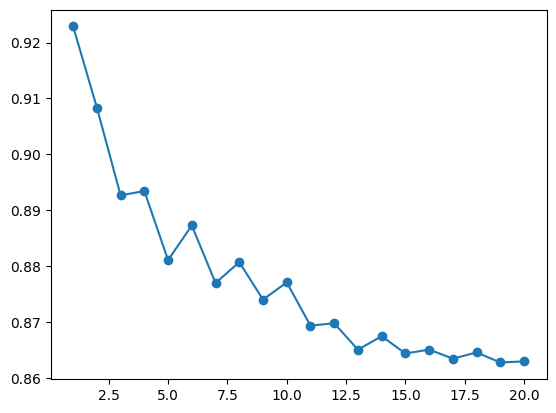

In [ ]:
plt.plot(n, score, 'o-')

In [ ]:
d = pd.DataFrame(list(zip(n, score)), columns = ['k', 'f1_score'])
d.sort_values(by = ['f1_score'], ascending = False) # sorting by highest to lowest based on mean f1 score of cross validation

,k,f1_score
0,1,0.922867
1,2,0.908373
3,4,0.893458
2,3,0.892670
5,6,0.887292
4,5,0.881103
7,8,0.880741
9,10,0.877107
6,7,0.877006
8,9,0.874044


From the above table and graph, we can see that the cross validation for knn produces highest f1 score when k = 1. However, using k = 1 can cause overfitting problem as value of k is too small. Therefore, to prevent overfitting, k=3 would be the most ideal value, which is an odd number and has next highest mean f1 score for odd numbers.

In [ ]:
d.loc[d['k']==3]

,k,f1_score
2,3,0.89267


* Using k=3 to train the model since it is the best k value considering cross validation scores for f1 scores of odd numbers

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)
final_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
final_score.mean()

0.8926696724910134

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluation

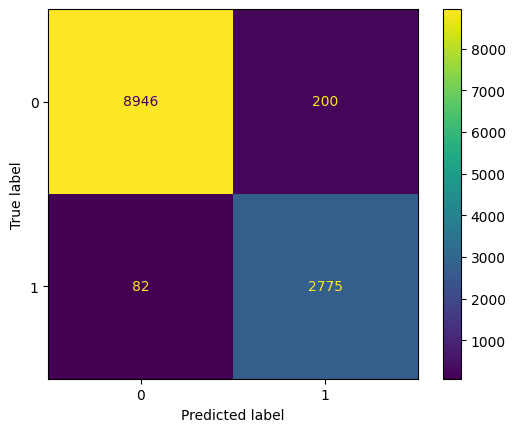

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.88      0.93      0.90       715

    accuracy                           0.95      3001
   macro avg       0.93      0.94      0.94      3001
weighted avg       0.95      0.95      0.95      3001



# SVM

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [ ]:
report = classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.91      0.89      0.90       715

    accuracy                           0.95      3001
   macro avg       0.94      0.93      0.94      3001
weighted avg       0.95      0.95      0.95      3001



# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [ ]:
report = classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.96      0.95       715

    accuracy                           0.97      3001
   macro avg       0.96      0.97      0.96      3001
weighted avg       0.97      0.97      0.97      3001



In [ ]:
x = cross_val_score(model, X_train, y_train, scoring='f1')
x.mean()

0.9501957100019119

# Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [ ]:
report = classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.96      0.98       715

    accuracy                           0.99      3001
   macro avg       0.99      0.98      0.99      3001
weighted avg       0.99      0.99      0.99      3001



In [ ]:
# Cross Validation Score on f1
x = cross_val_score(model, X_train, y_train, scoring='f1',cv=10)
x.mean()

0.9812136446412738

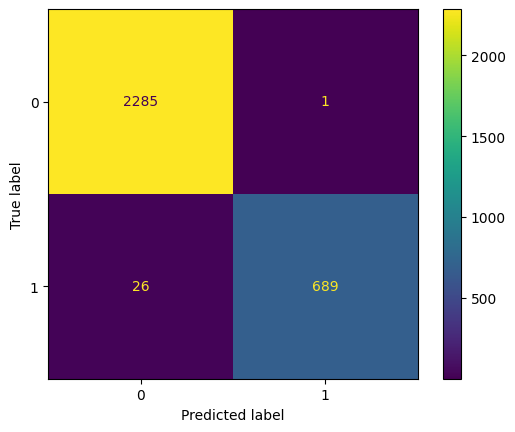

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# Comparison of all models with F1 score

In [ ]:
compare_model = [LogisticRegression(max_iter=5000), KNeighborsClassifier(n_neighbors=3), SVC(), DecisionTreeClassifier(),
         RandomForestClassifier()]
compare_model

[LogisticRegression(max_iter=5000),
 KNeighborsClassifier(n_neighbors=3),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [ ]:
f1_scores = []
for x_model in compare_model:
  x_model.fit(X_train, y_train)
  y_pred = x_model.predict(X_test)
  f1 = f1_score(y_true=y_test, y_pred=y_pred)
  f1_scores.append(round(f1, 3))

In [ ]:
f1_scores

[0.439, 0.903, 0.904, 0.947, 0.983]

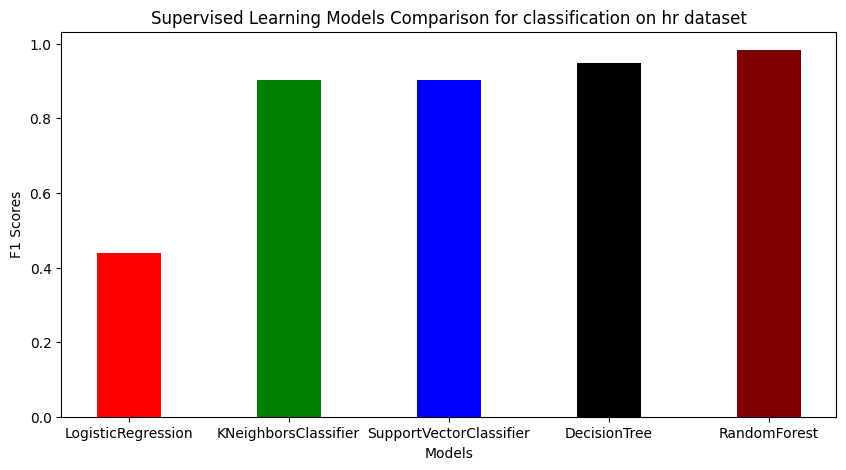

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(['LogisticRegression', 'KNeighborsClassifier', 'SupportVectorClassifier', 'DecisionTree', 'RandomForest'], f1_scores,
        color=['red', 'green', 'blue', 'black', 'maroon'] ,width=0.4)
plt.title('Supervised Learning Models Comparison for classification on hr dataset')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.show()

In [ ]:
data = pd.DataFrame(list(zip(['LogisticRegression', 'KNeighborsClassifier', 'SupportVectorClassifier', 'DecisionTree', 'RandomForest'], f1_scores)), columns=['Models', 'F1 Scores'])
data.sort_values(by='F1 Scores', ascending=False)

,Models,F1 Scores
4,RandomForest,0.983
3,DecisionTree,0.947
2,SupportVectorClassifier,0.904
1,KNeighborsClassifier,0.903
0,LogisticRegression,0.439


# Conclusion

Among these Supervised Learning Models, the one that performed the best for classification of hr data is Random Forest, obtaining f1 score of 0.983 on test data.